Data project:

CAPM - financial data

Choose 2 stocks and market (SP-500)
1. Data
- Import stock data from csv/api
- Merge stock data together
- Calculate expected return matrix
- Calculate covariance matrix

2. CAPM Regression
- Calculate stock regression.

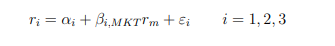

- What is the market exposure/risk premium (Betas)
- Does CAPM hold? (Is alpha = 0)

3. CAPM: Portfolio
- Find Minimum variance portfolio and Efficient tangent portfolio (Highest sharpe ratio).
- Plot portfolios in volatility-return diagram.



In [1]:
import yfinance as yf
import pandas as pd
import numpy as np


## 1.1) Importing data

In [7]:
data = yf.download(["^GSPC", "NVO", "MSFT"], start = "2020-01-01", end = "2024-04-08", interval = "1mo")
#data = data.iloc[:, :2]
data = data["Adj Close"]

data['sp500_returns'] = data['^GSPC'].pct_change() * 100
data["msft_returns"] = data["MSFT"].pct_change() * 100
data["nvo_returns"] = data["NVO"].pct_change() * 100
data = data.dropna()

print(data)

[                       0%%                      ]

[*********************100%%**********************]  3 of 3 completed

Ticker            MSFT         NVO        ^GSPC  sp500_returns  msft_returns  \
Date                                                                           
2020-02-01  155.830826   27.309948  2954.219971      -8.411048     -4.828750   
2020-03-01  152.109161   28.282454  2584.590088     -12.511928     -2.388272   
2020-04-01  172.845627   29.752953  2912.429932      12.684404     13.632621   
2020-05-01  176.742157   30.979155  3044.310059       4.528182      2.254341   
2020-06-01  196.829285   30.763041  3100.290039       1.838840     11.365216   
2020-07-01  198.280060   30.692570  3271.120117       5.510132      0.737073   
2020-08-01  218.126450   31.026133  3500.310059       7.006467     10.009272   
2020-09-01  203.917160   32.873474  3363.000000      -3.922797     -6.514244   
2020-10-01  196.296799   30.250412  3269.959961      -2.766579     -3.736989   
2020-11-01  207.543137   31.784472  3621.629883      10.754564      5.729252   
2020-12-01  216.203094   33.072334  3756

## 1.2 Return and covariance matrix

In [103]:
returns = data.iloc[:, [4,5]]
return_matrix = np.mean(returns, axis = 0)
print(return_matrix)

Ticker
msft_returns    2.097667
nvo_returns     3.109085
dtype: float64


In [104]:
cov_matrix = returns.cov()
print(cov_matrix)

Ticker        msft_returns  nvo_returns
Ticker                                 
msft_returns     42.671057    20.331738
nvo_returns      20.331738    36.689332


## 3 Portfolios

In [105]:
def portfolio(return_matrix, cov_matrix, x):
    w = pd.DataFrame([x, 1-x], index=['msft_returns', 'nvo_returns'])
    tw = w.transpose()
    var = tw.dot(cov_matrix).dot(w)
    sd = np.sqrt(var)[0][0]
    
    e_r = tw.dot(return_matrix)[0]

    return e_r, sd

In [107]:
er, sd = portfolio(return_matrix, cov_matrix, 0.4)

print(f'Expected return = {er:.3f}, Execpted volatility = {sd:.3f}')

Expected return = 2.705, Execpted volatility = 5.458


## Minimum Variance Portfolio

## Efficient Tangent Portfolio

Efficient markeds rand;

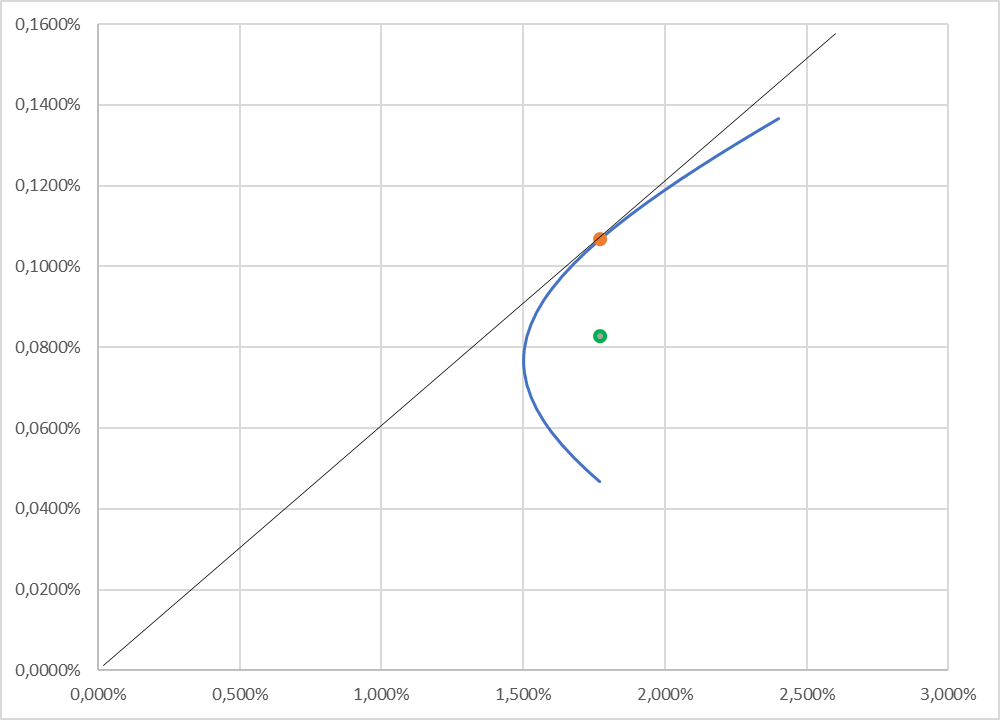